In [2]:
# Is this readable? Yes!  I think so!

We will import our usual things:

In [6]:
%matplotlib inline 
# makes sure I've got inline plots, gotta not be next to % magic function
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.family"] = "sans-serif"

import numpy as np

# to deal with images
import PIL.Image as Image

In [7]:
im = Image.open("/Users/jillnaiman/Downloads/stitch_reworked.png")

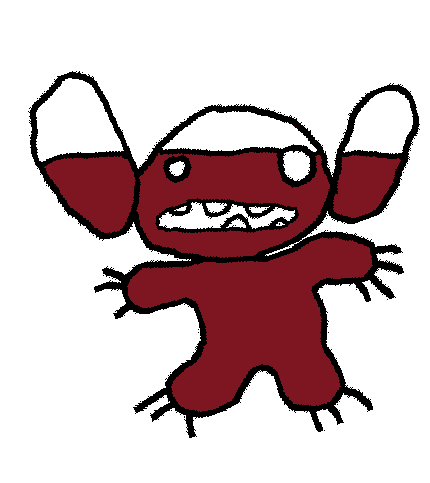

In [8]:
im

In [9]:
im_data = np.array(im)
im_data

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [10]:
im_data.shape

(483, 430, 4)

Let's use a cool NumPy function to see how many RGBA combinations (i.e. how many colors are in our image):

In [18]:
np.unique(im_data.reshape(-1, im_data.shape[2]), axis=0)

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [13]:
np.unique(im_data)

array([  0,  22,  33, 126, 255], dtype=uint8)

In [14]:
im.show()

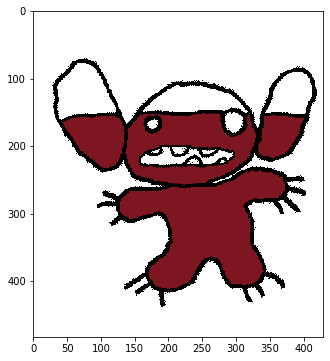

In [20]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(im_data)
plt.show()

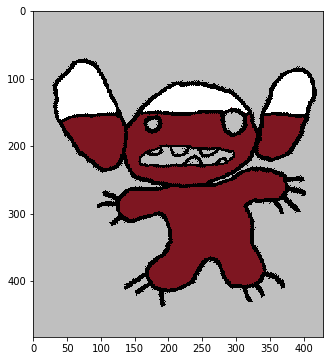

In [25]:
fig, ax = plt.subplots(figsize=(6,6))
# I'm going to do a little trick and plot gray underneath
ax.imshow(im_data*0.0+0.5) # a bunch of RGBA = (0.5, 0.5, 0.5, 0.5)
ax.imshow(im_data)
plt.show()

In [26]:
#im_data*0.0+0.5

Let's think about how we can filter our data.

Let's first pick out all the "good" pixels.

In [31]:
# for white: RGBA = 255, 255, 255, 255
# "mask" out just the good pixels
reds_good_mask = im_data[:,:,0] == 255
greens_good_mask = im_data[:,:,1] == 255
blues_good_mask = im_data[:,:,2] == 255
alpha_good_mask = im_data[:,:,3] == 255
#im_data[reds_good_mask]
pixel_mask_good = reds_good_mask & greens_good_mask & blues_good_mask \
  & alpha_good_mask

In [32]:
good_pixels = im_data[pixel_mask_good]

In [33]:
ngood = len(good_pixels)
ngood

11929

I'm going to replot our image with just these pixels showing:

In [34]:
im_data_masked_good = im_data.copy() # numpy way of copying data
im_data_masked_good[~pixel_mask_good] = 0 
# this will make all of the the "not good" pixels transparent (and black)

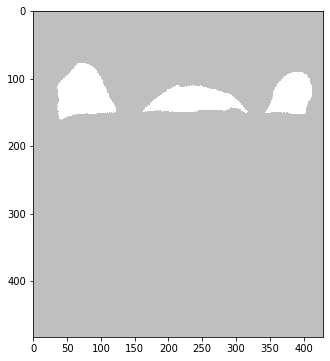

In [35]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(im_data*0.0+0.5) # our trick to make gray background
ax.imshow(im_data_masked_good)
plt.show()

In [36]:
reds_bad_mask = im_data[:,:,0] == 126 # RED!!!
greens_bad_mask = im_data[:,:,1] == 22
blues_bad_mask = im_data[:,:,2] == 33
alpha_bad_mask = im_data[:,:,3] == 255 # 255 = fully opaque (not transparent)

pixel_mask_bad = reds_bad_mask & greens_bad_mask & blues_bad_mask \
  & alpha_bad_mask

In [38]:
nbad = len(im_data[pixel_mask_bad])
nbad

40949

In [39]:
total_pixels = ngood + nbad # total number of good or bad pixels
badness = nbad/total_pixels
goodness = ngood/total_pixels
print("badness =", badness, "goodness=", goodness)

badness = 0.774405234691176 goodness= 0.22559476530882408


One way of plotting our new, filtered and mutated data is as a histogram.

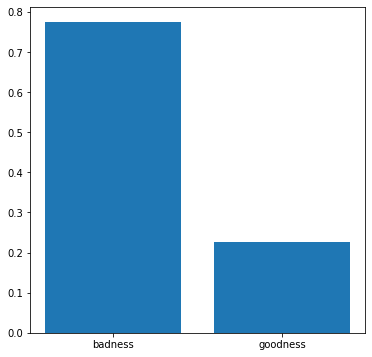

In [40]:
fig, ax = plt.subplots(figsize=(6,6))
labels = np.array(["badness", "goodness"])
values = np.array([badness, goodness])

ax.bar(labels, values)

plt.show()

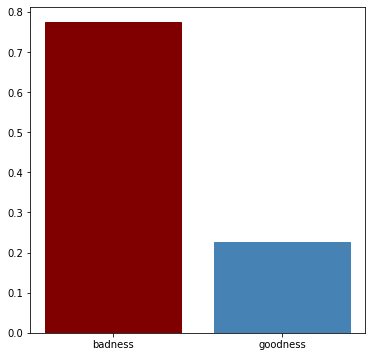

In [41]:
fig, ax = plt.subplots(figsize=(6,6))
labels = np.array(["badness", "goodness"])
values = np.array([badness, goodness])
colors = np.array(['maroon', 'steelblue'])

myBarChart = ax.bar(labels, values)

# set colors of each bar individually
for i in range(len(myBarChart)): # for all bars in my barchart
    myBarChart[i].set_color(colors[i])
    
plt.show()